# Modelagem para Predição

## Análise Exploratória de Dados

In [1]:
#Importamos as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df_carrs = pd.read_csv('../data/cars_train.csv', encoding='utf-16',  sep ='\t', index_col=0)

In [3]:
df_carrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29584 entries, 300716223898539419613863097469899222392 to 171781413417552881896009715888472310172
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29407 non-null  float64
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  float64
 6   hodometro                29584 non-null  float64
 7   cambio                   29584 non-null  object 
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  object 
 10  blindado                 29584 non-null  object 
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null  object 
 13  cidade_ve

In [4]:
df_carrs.veiculo_único_dono.fillna('', inplace=True)

In [5]:
df_carrs.head()

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.00,67772.00,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59
279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.00,62979.00,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33
56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.00,44070.00,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,,NaN,NaN,NaN,NaN,NaN,NaN,162824.81
56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.00,85357.00,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.36
338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.00,71491.00,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76


In [6]:
# Alteração para os dados NaN
df_carrs.revisoes_concessionaria.fillna(0, inplace=True)
df_carrs.garantia_de_fábrica.fillna(0, inplace=True)
df_carrs.revisoes_dentro_agenda.fillna(0, inplace=True)
df_carrs.veiculo_alienado.fillna(0, inplace=True)
df_carrs.veiculo_único_dono.fillna(0, inplace=True)

In [7]:
# Retirar o nome do Estado e deixar só a sigla
df_carrs['UF'] = df_carrs['estado_vendedor'].apply(lambda x: x[-3:-1])

In [8]:
df_carrs.head()

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,UF
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.00,67772.00,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,0,0,0.00,74732.59,SP
279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.00,62979.00,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,,0,IPVA pago,NaN,0,0,0.00,81965.33,MG
56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.00,44070.00,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,,0,NaN,NaN,0,0,0.00,162824.81,SP
56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.00,85357.00,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,,0,IPVA pago,Licenciado,0,0,0.00,123681.36,SP
338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.00,71491.00,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,0.00,82419.76,RJ


<AxesSubplot:xlabel='UF', ylabel='count'>

<Figure size 432x288 with 0 Axes>

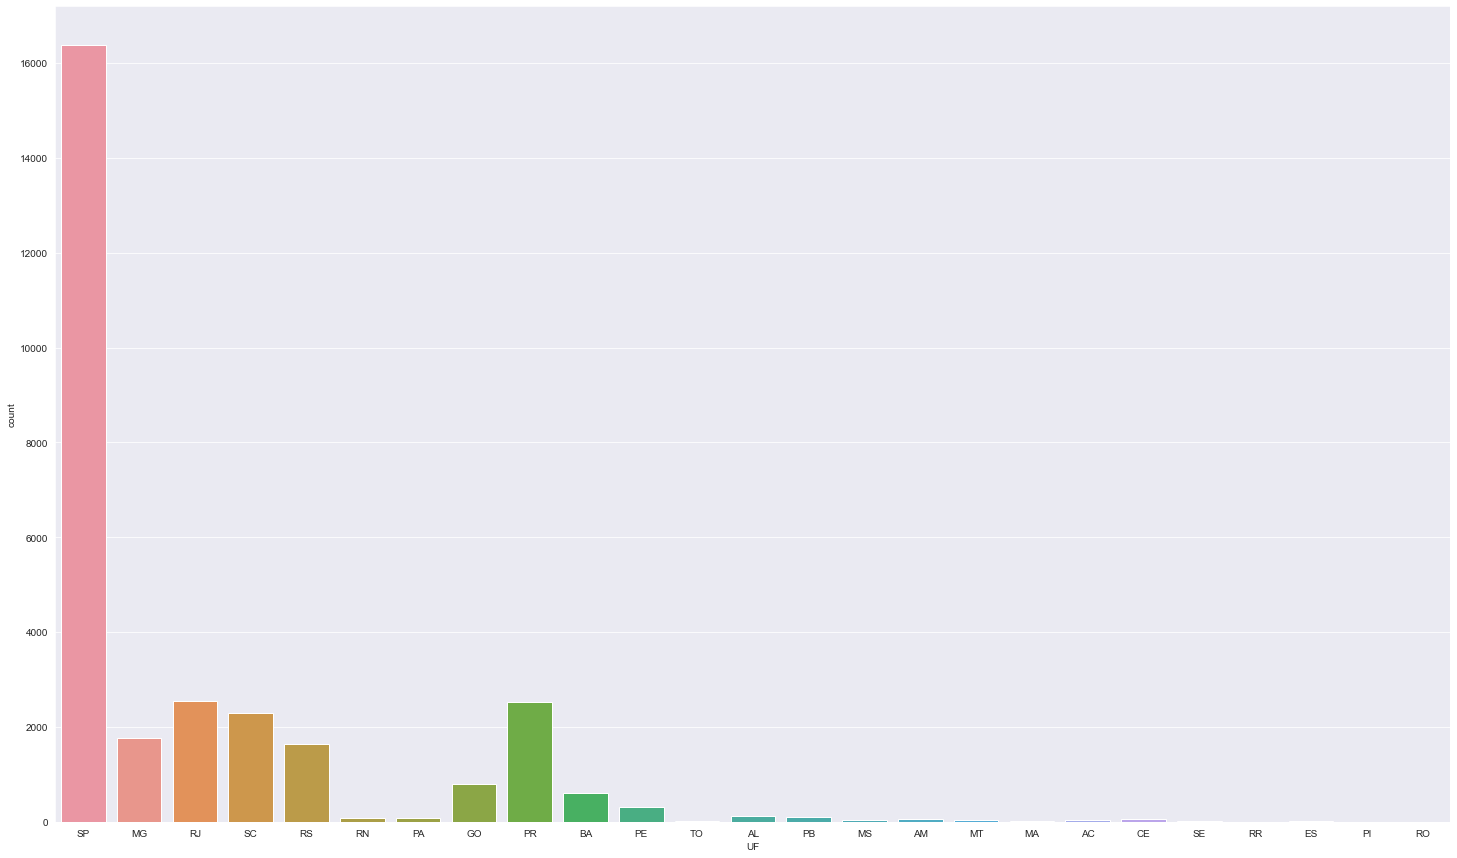

In [9]:
# Analisando o número de carros por Estado
sns.set_style("darkgrid")
plt.tight_layout()
plt.figure(figsize=(25,15))
sns.countplot(data=df_carrs, x='UF')

#df_carrs.UF.value_counts()

In [10]:
#Importando o LabelEnconder para transformar as variáveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder

In [11]:
leBlindado = LabelEncoder()
df_carrs.blindado = leBlindado.fit_transform(df_carrs.blindado)

In [12]:
df_carrs.cambio.unique()

array(['CVT', 'Automática', 'Manual', 'Automatizada', 'Semi-automática',
       'Automatizada DCT', 'Automática Sequencial'], dtype=object)

In [13]:
#as listas são para que não se percam informações na hora de responder às perguntas de negócio
list(leBlindado.classes_)

['N', 'S']

In [14]:
leCambio = LabelEncoder()

In [15]:
df_carrs.cambio = leCambio.fit_transform(df_carrs.cambio)

In [16]:
df_carrs.cambio.unique()

array([4, 2, 5, 0, 6, 1, 3])

In [17]:
list(leCambio.classes_)

['Automatizada',
 'Automatizada DCT',
 'Automática',
 'Automática Sequencial',
 'CVT',
 'Manual',
 'Semi-automática']

In [18]:
leUF = LabelEncoder()

In [19]:
df_carrs.UF = leUF.fit_transform(df_carrs.UF)

In [20]:
df_carrs.UF.unique()

array([23,  8, 16, 21, 20, 17, 11,  6, 15,  3, 13, 24,  1, 12,  9,  2, 10,
        7,  0,  4, 22, 19,  5, 14, 18])

In [21]:
list(leUF.classes_)

['AC',
 'AL',
 'AM',
 'BA',
 'CE',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PI',
 'PR',
 'RJ',
 'RN',
 'RO',
 'RR',
 'RS',
 'SC',
 'SE',
 'SP',
 'TO']

In [22]:
leVersao = LabelEncoder()

In [23]:
df_carrs.versao = leVersao.fit_transform(df_carrs.versao)

In [24]:
list(leVersao.classes_)

['0.6 HÍBRIDO REX FULL 4P AUTOMÁTICO',
 '1.0 12V FLEX 4P MANUAL',
 '1.0 12V FLEX EVOLUTION MANUAL',
 '1.0 12V FLEX SENSE MANUAL',
 '1.0 12V FLEX V-DRIVE MANUAL',
 '1.0 12V FLEX VISION MANUAL',
 '1.0 12V MPI TOTALFLEX 4P MANUAL',
 '1.0 12V MPI TOTALFLEX TRENDLINE 4P MANUAL',
 '1.0 12V SCE FLEX AUTHENTIQUE MANUAL',
 '1.0 12V SCE FLEX EXPRESSION MANUAL',
 '1.0 12V SCE FLEX GT LINE MANUAL',
 '1.0 12V SCE FLEX INTENSE MANUAL',
 '1.0 12V SCE FLEX LIFE MANUAL',
 '1.0 12V SCE FLEX OUTSIDER MANUAL',
 '1.0 12V SCE FLEX S EDITION MANUAL',
 '1.0 12V SCE FLEX VIBE MANUAL',
 '1.0 12V SCE FLEX ZEN MANUAL',
 '1.0 16V FLEX 2P MANUAL',
 '1.0 16V FLEX 4P MANUAL',
 '1.0 170 TSI TOTAL FLEX CONNECT 4P MANUAL',
 '1.0 170 TSI TOTAL FLEX XTREME 4P MANUAL',
 '1.0 200 TSI COMFORTLINE AUTOMÁTICO',
 '1.0 200 TSI HIGHLINE AUTOMÁTICO',
 '1.0 200 TSI SENSE AUTOMÁTICO',
 '1.0 200 TSI TOTAL FLEX AUTOMÁTICO',
 '1.0 200 TSI TOTAL FLEX COMFORTLINE AUTOMÁTICO',
 '1.0 200 TSI TOTAL FLEX COMFORTLINE TIPTRONIC',
 '1.0 200 TSI

In [25]:
leModelo = LabelEncoder()

In [26]:
df_carrs.modelo = leVersao.fit_transform(df_carrs.modelo)

In [27]:
leTipo = LabelEncoder()

In [28]:
df_carrs.tipo = leTipo.fit_transform(df_carrs.tipo)

In [29]:
#transformamos o tipo para int
df_carrs.ano_modelo = df_carrs.ano_modelo.astype(int)

In [30]:
df_carrs.revisoes_concessionaria.unique()

array(['Todas as revisões feitas pela concessionária', 0], dtype=object)

In [31]:
# Encoding das variáveis e tranformação dos tipos
df_carrs.revisoes_concessionaria.replace('Todas as revisões feitas pela concessionária', 1, inplace=True)
df_carrs.revisoes_concessionaria = df_carrs.revisoes_concessionaria.astype(int)

In [32]:
df_carrs.garantia_de_fábrica.replace('Garantia de fábrica', 1, inplace=True)
df_carrs.garantia_de_fábrica.replace = df_carrs.revisoes_concessionaria.astype(int)

In [33]:
df_carrs.veiculo_único_dono.unique()

array(['', 'Único dono'], dtype=object)

In [34]:
df_carrs.veiculo_único_dono.replace('Único dono', 1, inplace=True)

In [35]:
df_carrs.veiculo_único_dono.replace('', 0, inplace=True)
df_carrs.veiculo_único_dono = df_carrs.veiculo_único_dono.astype(int)

In [36]:
df_carrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29584 entries, 300716223898539419613863097469899222392 to 171781413417552881896009715888472310172
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29407 non-null  float64
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  int32  
 3   versao                   29584 non-null  int32  
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  int32  
 6   hodometro                29584 non-null  float64
 7   cambio                   29584 non-null  int32  
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  int32  
 10  blindado                 29584 non-null  int32  
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null  object 
 13  cidade_ve

In [37]:
df_carrs.describe()

,num_fotos,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,veiculo_alienado,preco,UF
count,29407.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00
mean,10.32,225.94,826.73,2016.76,2017.81,58430.59,2.62,3.94,4.28,0.01,0.35,0.31,0.15,0.00,133023.88,19.19
std,3.49,128.93,524.19,4.06,2.67,32561.77,1.19,0.34,1.56,0.09,0.48,0.46,0.35,0.00,81662.87,5.68
min,8.00,0.00,0.00,1985.00,1997.00,100.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9869.95,0.00
25%,8.00,133.00,358.00,2015.00,2016.00,31214.00,2.00,4.00,4.00,0.00,0.00,0.00,0.00,0.00,76571.77,16.00
50%,8.00,236.00,876.00,2018.00,2018.00,57434.00,2.00,4.00,5.00,0.00,0.00,0.00,0.00,0.00,114355.80,23.00
75%,14.00,326.00,1257.00,2019.00,2020.00,81953.50,2.00,4.00,5.00,0.00,1.00,1.00,0.00,0.00,163679.62,23.00
max,21.00,456.00,1915.00,2022.00,2023.00,390065.00,6.00,4.00,6.00,1.00,1.00,1.00,1.00,0.00,1359812.89,24.00


## Avaliando possível correlação entre variáveis

(<AxesSubplot:>,)

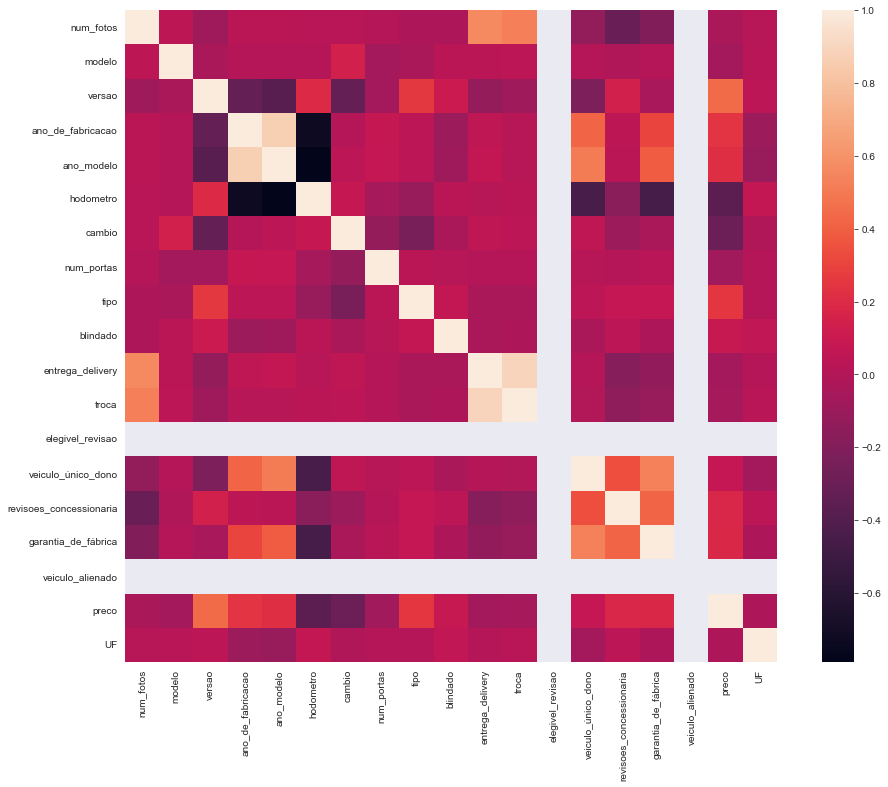

In [38]:
figura, graficos = plt.subplots(figsize=(16, 12))
corr = df_carrs.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            square=True, ax=graficos), 

## Preparação do dataset para avaliação pelos modelos

In [39]:
#Import das ferramentas de scikit-learn para separar as bases e realizar o treinamento nos modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [40]:
X = df_carrs[['modelo', 'versao', 'ano_de_fabricacao', 'ano_modelo', 'cambio', 'tipo', 'blindado', 'veiculo_único_dono', 'garantia_de_fábrica', 'UF']]

In [41]:
y = df_carrs['preco']

In [42]:
X.describe()

,modelo,versao,ano_de_fabricacao,ano_modelo,cambio,tipo,blindado,veiculo_único_dono,garantia_de_fábrica,UF
count,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00,29584.00
mean,225.94,826.73,2016.76,2017.81,2.62,4.28,0.01,0.35,0.15,19.19
std,128.93,524.19,4.06,2.67,1.19,1.56,0.09,0.48,0.35,5.68
min,0.00,0.00,1985.00,1997.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,133.00,358.00,2015.00,2016.00,2.00,4.00,0.00,0.00,0.00,16.00
50%,236.00,876.00,2018.00,2018.00,2.00,5.00,0.00,0.00,0.00,23.00
75%,326.00,1257.00,2019.00,2020.00,2.00,5.00,0.00,1.00,0.00,23.00
max,456.00,1915.00,2022.00,2023.00,6.00,6.00,1.00,1.00,1.00,24.00


In [43]:
# Separação do dataset entre treino(70%) e teste(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20708, 10), (8876, 10), (20708,), (8876,))

In [45]:
# Normalização - MinMaxScaler, Padronização - StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Criar scaler
scaler = MinMaxScaler()

In [46]:
colunas = X_train.columns

# Parte importante!! Fit no treino! Transform no treino e teste
X_train[colunas] = scaler.fit_transform(X_train)
X_test[colunas] = scaler.transform(X_test)

X_train.shape, X_test.shape

((20708, 10), (8876, 10))

In [47]:
X_train.describe()

,modelo,versao,ano_de_fabricacao,ano_modelo,cambio,tipo,blindado,veiculo_único_dono,garantia_de_fábrica,UF
count,20708.00,20708.00,20708.00,20708.00,20708.00,20708.00,20708.00,20708.00,20708.00,20708.00
mean,0.49,0.43,0.86,0.70,0.44,0.71,0.01,0.35,0.15,0.80
std,0.28,0.27,0.11,0.16,0.20,0.26,0.09,0.48,0.35,0.24
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.19,0.81,0.59,0.33,0.67,0.00,0.00,0.00,0.67
50%,0.52,0.46,0.89,0.71,0.33,0.83,0.00,0.00,0.00,0.96
75%,0.71,0.66,0.95,0.82,0.33,0.83,0.00,1.00,0.00,0.96
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [48]:
X_test.describe()

,modelo,versao,ano_de_fabricacao,ano_modelo,cambio,tipo,blindado,veiculo_único_dono,garantia_de_fábrica,UF
count,8876.00,8876.00,8876.00,8876.00,8876.00,8876.00,8876.00,8876.00,8876.00,8876.00
mean,0.49,0.43,0.86,0.69,0.43,0.72,0.01,0.35,0.15,0.80
std,0.28,0.27,0.11,0.16,0.20,0.26,0.09,0.48,0.35,0.23
min,-0.00,0.00,0.14,-0.53,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.19,0.81,0.59,0.33,0.67,0.00,0.00,0.00,0.67
50%,0.52,0.46,0.89,0.71,0.33,0.83,0.00,0.00,0.00,0.96
75%,0.71,0.66,0.92,0.82,0.33,0.83,0.00,1.00,0.00,0.96
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## LinearRegression

In [49]:
# Criando o estimador, algorimo, modelo, preditor, regressor
from sklearn.linear_model import LinearRegression

regressao_linear = LinearRegression()

# Vamos treinar utilizando cross validation
valores_rmse_rl = cross_val_score(estimator=regressao_linear, 
                                  X=X_train, 
                                  y=y_train, 
                                  cv=10, # 10-fold CV
                                  scoring='neg_root_mean_squared_error')
valores_rmse_rl

array([-61644.20642833, -64963.78334939, -67629.19856727, -59579.9484662 ,
       -59010.69216089, -67467.31707073, -63222.00724431, -69049.25799801,
       -64708.07705831, -59288.60671706])

In [50]:
len(valores_rmse_rl)

10

In [51]:
# Coeficientes da Regressão
valores_rmse_rl = valores_rmse_rl * -1
valores_rmse_rl

array([61644.20642833, 64963.78334939, 67629.19856727, 59579.9484662 ,
       59010.69216089, 67467.31707073, 63222.00724431, 69049.25799801,
       64708.07705831, 59288.60671706])

In [52]:
# Média da Regressão
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_rl

63656.30950605097

In [53]:
# Score da validação Cruzada da Regressão Linear
100 * cross_val_score(regressao_linear, X_train, y_train).mean()

39.81406719037898

## DecisionTreeRegressor

In [54]:
# Criando o estimador, algorimo, modelo, preditor, regressor
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

# Vamos treinar utilizando cross validation (sempre!!)
valores_rmse_arvore = cross_val_score(estimator=arvore_regressao, 
                                      X=X_train, 
                                      y=y_train, 
                                      cv=10, # 
                                  scoring='neg_root_mean_squared_error')
valores_rmse_arvore

array([-62064.67361674, -57698.31207584, -59100.43172761, -54719.97466485,
       -56035.94404781, -62287.56585862, -57805.30820871, -65041.30906013,
       -61043.52715858, -53138.57597299])

In [55]:
# Coeficientes da Árvore de Regressão
valores_rmse_arvore = valores_rmse_arvore * -1
valores_rmse_arvore

array([62064.67361674, 57698.31207584, 59100.43172761, 54719.97466485,
       56035.94404781, 62287.56585862, 57805.30820871, 65041.30906013,
       61043.52715858, 53138.57597299])

In [56]:
# Média da Árvore de Regressão
media_rmse_arvore = valores_rmse_arvore.mean()
media_rmse_arvore

58893.56223918907

In [57]:
# Score da validação Cruzada da Árvore de Regressão
100 * cross_val_score(arvore_regressao, X_train, y_train).mean()

47.9659798160884

In [58]:
# Treinando o modelo a predição com Regressão Linear 
regressao_linear.fit(X_train, y_train)

LinearRegression()

In [59]:
regressao_linear.coef_

array([ -8506.80035254, 160650.49430158, 159069.35486791, 121299.54050235,
       -43456.14253338,  17205.579703  ,  61131.87601815,  -7458.65444807,
        15909.94573768,  -1984.55838889])

In [60]:
# ver estimadores scikit learn
# estimador é treinado com fit
# estimador prediz com predict
precos_preditos_regLinear = regressao_linear.predict(X_test)
precos_preditos_regLinear[:5]

array([156373.87600052, 102401.7290235 , 148171.01215661, 225283.76567961,
        94001.66592071])

In [61]:
# Valores preditos com a Regressão Linear
len(precos_preditos_regLinear)

8876

In [62]:
y_test.head()

id
174158513088796592806405616354018132916   176649.29
258739094963319078702833465174152949981    63887.18
308044418635815622191514066805307476358   110585.63
274993703978196215848880951781280902334   417461.60
231848848645830507022484988656002410939   118224.02
Name: preco, dtype: float64

In [63]:
# Mostrando as previsões realizadas com Regressão Linear e a diferença entre os valores reais do dataset de treino
predicoes_vs_real_mod1 = pd.DataFrame({'predicao': precos_preditos_regLinear.flatten(), 'real': y_test.values.flatten()})
predicoes_vs_real_mod1['diferenca_abs'] = abs(predicoes_vs_real_mod1['predicao'] - predicoes_vs_real_mod1['real'])
predicoes_vs_real_mod1.head(10)

,predicao,real,diferenca_abs
0,156373.88,176649.29,20275.42
1,102401.73,63887.18,38514.55
2,148171.01,110585.63,37585.39
3,225283.77,417461.60,192177.83
4,94001.67,118224.02,24222.35
5,148050.49,296129.36,148078.87
6,117633.58,94491.78,23141.80
7,120598.28,103051.03,17547.26
8,137811.54,149133.47,11321.93
9,120975.82,90282.67,30693.14


In [64]:
# Mostrando as medidas de desempenho
print('MAE:', metrics.mean_absolute_error(y_test, precos_preditos_regLinear))
print('MSE:', metrics.mean_squared_error(y_test, precos_preditos_regLinear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, precos_preditos_regLinear)))

MAE: 43594.02210659438
MSE: 3732294010.2777524
RMSE: 61092.503715904066


In [65]:
# Treinando o modelo com Árvore de Regressão 
arvore_regressao.fit(X_train, y_train)

DecisionTreeRegressor()

In [66]:
# Prevendo os preços com o modelo de Árvore de Regressão
precos_preditos_arvoreRegressao = arvore_regressao.predict(X_test)
precos_preditos_arvoreRegressao[:5]

array([126917.37295327,  93442.55924488, 133704.90029668, 276249.49345499,
        98745.78783695])

In [67]:
# Valores preditos com a Regressão Linear
len(precos_preditos_arvoreRegressao)

8876

In [68]:
# Mostrando as previsões realizadas com Árvore de Regressão e a diferença entre os valores reais do dataset de treino
predicoes_vs_real_mod2 = pd.DataFrame({'predicao': precos_preditos_arvoreRegressao.flatten(), 'real': y_test.values.flatten()})
predicoes_vs_real_mod2['diferenca_abs'] = abs(predicoes_vs_real_mod2['predicao'] - predicoes_vs_real_mod2['real'])
predicoes_vs_real_mod2.head(10)

,predicao,real,diferenca_abs
0,126917.37,176649.29,49731.92
1,93442.56,63887.18,29555.38
2,133704.90,110585.63,23119.27
3,276249.49,417461.60,141212.10
4,98745.79,118224.02,19478.23
5,229367.08,296129.36,66762.28
6,119802.28,94491.78,25310.49
7,106933.36,103051.03,3882.33
8,181175.12,149133.47,32041.65
9,83988.51,90282.67,6294.17


In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, precos_preditos_arvoreRegressao))
print('MSE:', metrics.mean_squared_error(y_test, precos_preditos_arvoreRegressao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, precos_preditos_arvoreRegressao)))

MAE: 34455.27911648524
MSE: 3218183144.617533
RMSE: 56729.032643061466


In [70]:
# Avaliação se o modelo se comporta melhor que uma simples média
# Teste com r quadrado
from sklearn.metrics import r2_score

100 * r2_score(y_true=y_test, y_pred=precos_preditos_regLinear)

42.409825519394374

## XGBRegressor

In [71]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [72]:
XgboostRegressor = xgb.XGBRegressor()
XgboostRegressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [73]:
XgboostRegressor.objective

'reg:squarederror'

In [74]:
# Cross validation XGBoost
valores_XgboostRegressor = cross_val_score(estimator=XgboostRegressor,
                                           X=X_train, 
                                           y=y_train,
                                           cv=10, # 10-Fold split
                                           scoring='neg_root_mean_squared_error')
valores_XgboostRegressor

array([-44677.2292521 , -48975.56543561, -47244.73025616, -42668.57043421,
       -42053.63547912, -49942.87559234, -43920.37336052, -49054.31921126,
       -44658.2123777 , -40465.70684142])

In [75]:
# Coeficientes do XGBoost
valores_XgboostRegressor = valores_XgboostRegressor * -1
valores_XgboostRegressor

array([44677.2292521 , 48975.56543561, 47244.73025616, 42668.57043421,
       42053.63547912, 49942.87559234, 43920.37336052, 49054.31921126,
       44658.2123777 , 40465.70684142])

In [76]:
precos_preditos_XgboostRegressor = XgboostRegressor.predict(X_test)
#mse = mean_squared_error(y_train, y_pred)

In [77]:
len(precos_preditos_XgboostRegressor)

8876

In [78]:
# Mostrando as previsões realizadas com XGBoost e a diferença entre os valores reais do dataset de treino
predicoes_vs_real_mod3 = pd.DataFrame({'predicao': precos_preditos_XgboostRegressor.flatten(), 'real': y_test.values.flatten()})
predicoes_vs_real_mod3['diferenca_abs'] = abs(predicoes_vs_real_mod3['predicao'] - predicoes_vs_real_mod3['real'])
predicoes_vs_real_mod3.head(10)

,predicao,real,diferenca_abs
0,129537.38,176649.29,47111.92
1,83628.62,63887.18,19741.44
2,128342.13,110585.63,17756.51
3,215833.50,417461.60,201628.10
4,101042.98,118224.02,17181.04
5,230084.91,296129.36,66044.45
6,95709.03,94491.78,1217.25
7,93183.55,103051.03,9867.48
8,128439.97,149133.47,20693.50
9,90046.87,90282.67,235.81


In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, precos_preditos_XgboostRegressor))
print('MSE:', metrics.mean_squared_error(y_test, precos_preditos_XgboostRegressor))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, precos_preditos_XgboostRegressor)))

MAE: 27822.13875846014
MSE: 1836444653.9326959
RMSE: 42853.758924191185


In [80]:
# Avaliação se o modelo se comporta melhor que uma simples média
# Teste com r quadrado
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=precos_preditos_XgboostRegressor)

0.7166322702533052

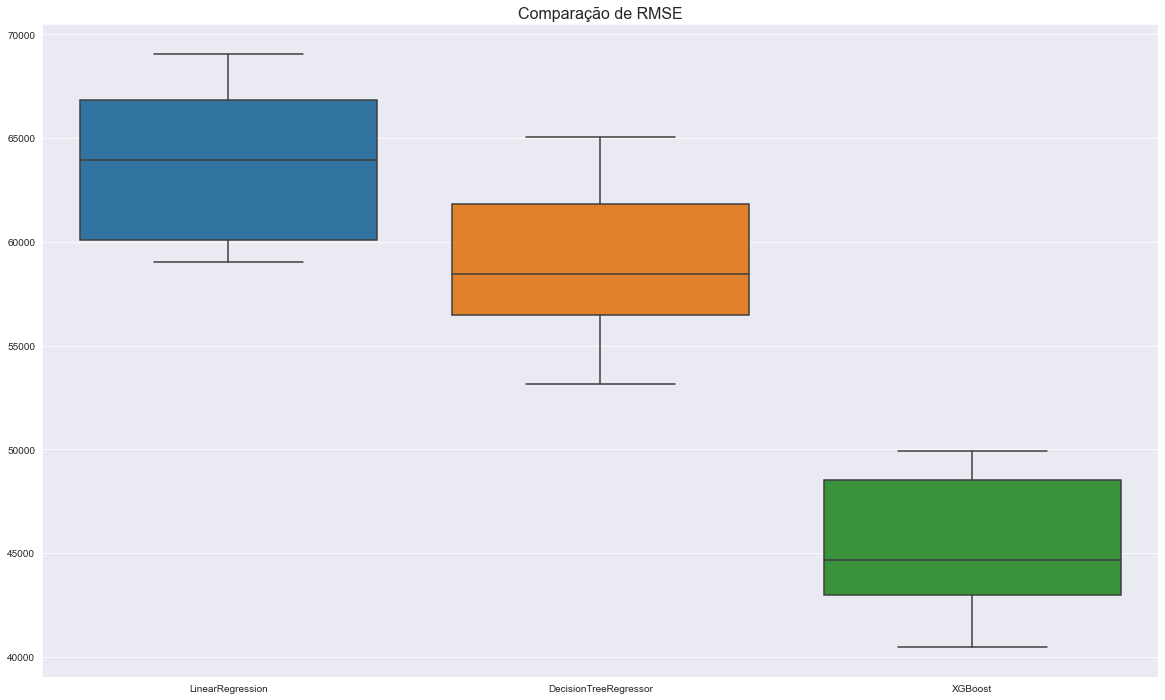

In [81]:
# Comparação gráfica dos três modelos utilizados
rmse = pd.DataFrame({'LinearRegression': valores_rmse_rl, 'DecisionTreeRegressor': valores_rmse_arvore,
                     'XGBoost': valores_XgboostRegressor})
boxPlotComparacao = sns.boxplot(data=rmse).set_title("Comparação de RMSE", fontsize = 15)
boxPlotComparacao.set_fontsize(16)
boxPlotComparacao.figure.set_size_inches(20, 12)

## Salvando o treinamento para realizar novas predições

In [82]:
# salvar modelo escolhido
import pickle
# salvar o modelo XGBoost (XgboostRegressor) no arquivo modeloPreditor.pkl.pkl
with open('modeloPreditor.pkl', 'wb') as file:
    pickle.dump(XgboostRegressor, file)

## Fim